In [8]:
import pandas as pd
data = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/research/MCarloLongRuns/data/data.csv")
print(data)
import matplotlib.pyplot as plt
import seaborn as sns

    Unnamed: 0    F      H  WShare_NT  WShare_VI  WShare_TF  SharpeNT  \
0            0  0.0    2.0  41.471506  41.466001  17.062493      -inf   
1            1  0.0    2.0  33.334551  33.397376  33.268073       inf   
2            2  0.0    5.0  33.341533  33.344518  33.313949      -inf   
3            3  0.0    5.0  33.333721  33.341067  33.325211       inf   
4            4  0.0   10.0  33.347965  33.350637  33.301398       inf   
5            5  0.0   10.0  43.743452  43.744868  12.511680      -inf   
6            6  0.0   21.0  42.399378  42.402534  15.198088       inf   
7            7  0.0   21.0  39.203291  39.195862  21.600847       inf   
8            8  0.0  521.0  46.279061  46.287233   7.433705       inf   
9            9  0.0  521.0  33.338237  33.341997  33.319766      -inf   
10          10  1.5    2.0  37.711314  32.731518  29.557168      -inf   
11          11  1.5    2.0  33.161957  38.271435  28.566608      -inf   
12          12  1.5    5.0  41.416554  34.992905  2

<AxesSubplot:xlabel='F', ylabel='WShare_NT'>

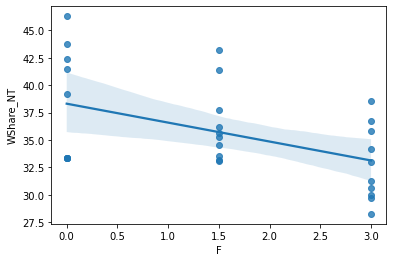

In [9]:
sns.regplot(x='F', y='WShare_NT', data=data)